In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import os
from PIL import Image
from torch.utils.data import Dataset,DataLoader,SubsetRandomSampler
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
from torchvision.models import resnet18
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/CelebA/Img/img_align_celeba.zip

Streaming output truncated to the last 5000 lines.
 extracting: img_align_celeba/197600.jpg  
 extracting: img_align_celeba/197601.jpg  
 extracting: img_align_celeba/197602.jpg  
 extracting: img_align_celeba/197603.jpg  
 extracting: img_align_celeba/197604.jpg  
 extracting: img_align_celeba/197605.jpg  
 extracting: img_align_celeba/197606.jpg  
 extracting: img_align_celeba/197607.jpg  
 extracting: img_align_celeba/197608.jpg  
 extracting: img_align_celeba/197609.jpg  
 extracting: img_align_celeba/197610.jpg  
 extracting: img_align_celeba/197611.jpg  
 extracting: img_align_celeba/197612.jpg  
 extracting: img_align_celeba/197613.jpg  
 extracting: img_align_celeba/197614.jpg  
 extracting: img_align_celeba/197615.jpg  
 extracting: img_align_celeba/197616.jpg  
 extracting: img_align_celeba/197617.jpg  
 extracting: img_align_celeba/197618.jpg  
 extracting: img_align_celeba/197619.jpg  
 extracting: img_align_celeba/197620.jpg  
 extracting: img_align_celeba/197621.jpg  
 ex

In [ ]:
attribute_path = '/content/drive/MyDrive/CelebA/Anno/list_attr_celeba.txt'
attribute_df = pd.read_csv(attribute_path,skiprows=[0],delim_whitespace=True)
attribute_df.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
np.sum(attribute_df.isna())

5_o_Clock_Shadow       0
Arched_Eyebrows        0
Attractive             0
Bags_Under_Eyes        0
Bald                   0
Bangs                  0
Big_Lips               0
Big_Nose               0
Black_Hair             0
Blond_Hair             0
Blurry                 0
Brown_Hair             0
Bushy_Eyebrows         0
Chubby                 0
Double_Chin            0
Eyeglasses             0
Goatee                 0
Gray_Hair              0
Heavy_Makeup           0
High_Cheekbones        0
Male                   0
Mouth_Slightly_Open    0
Mustache               0
Narrow_Eyes            0
No_Beard               0
Oval_Face              0
Pale_Skin              0
Pointy_Nose            0
Receding_Hairline      0
Rosy_Cheeks            0
Sideburns              0
Smiling                0
Straight_Hair          0
Wavy_Hair              0
Wearing_Earrings       0
Wearing_Hat            0
Wearing_Lipstick       0
Wearing_Necklace       0
Wearing_Necktie        0
Young                  0


In [ ]:
attribute_df=attribute_df.reset_index(drop=False)
attribute_df=attribute_df.rename(columns={'index':'filename'})
attribute_df.head()

,filename,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
def write_train_log(Accuracy,Loss,n_epochs,text,model_path):
  epochs=list(range(1,n_epochs+1))
  with open(model_path,'w') as f:
    f.write('\t\t\t')
    f.write(text)
    f.write("\n")
    df=pd.concat([pd.Series(epochs,name='Epochs'),pd.Series(accuracy,name='Accuracy(in%)'),pd.Series(Loss,name='Loss')],axis=1)
    df['Accuracy(in%)']=100*df['Accuracy(in%)']
    df_to_string=df.to_string(header=True,index=False)
    f.write(df_to_string)
    f.write("\n\n\n")
    f.close()

In [ ]:
def plot_results(Accuracy,Loss,n_epochs):
  Epochs=list(range(1,n_epochs+1))
  print(Epochs)
  plt.subplot(3,1,1)
  plt.plot(Epochs,Accuracy,color='green')
  plt.title("Epochs vs Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.subplot(3,1,3)
  plt.plot(Epochs,Loss,color='red')
  plt.title("Epochs vs loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()

In [ ]:
#evaluating test set
def evaluate(model,test_set,device):

  #not required to calculate gradient descent for test set

  model.eval()

  with torch.no_grad():
    test_loss,test_acc=0.0,0.0
    for batch in test_set:
      imgs,labels=batch
      imgs,labels=imgs.to(device),labels.to(device).long()
      y1=model(imgs)
      test_loss+=nn.functional.cross_entropy(y1,labels).item()
      test_acc+=torch.sum(torch.argmax(y1, dim=1) == labels)


  test_acc = float(float(test_acc)/float(len(test_set)))
  test_loss = float(float(test_loss)/float(len(test_set)))

  return test_acc,test_loss


#DATA LOADING

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])


In [ ]:
class CustomDataset(Dataset):
  def __init__(self,attr_df,attribute1,transform=None,attribute2=None,attribute3=None,attribute4=None,attribute5=None):
    self.file_dir = '/content/img_align_celeba'
    self.attr_df = attr_df
    self.attribute1 = attribute1
    self.attribute2 = attribute2
    self.attribute3 = attribute3
    self.attribute4 = attribute4
    self.attribute5 = attribute5
    self.transform = transform

  def __getitem__(self,idx):
    img_name = str(self.attr_df.iloc[idx]['filename'])
    img_dir = os.path.join(self.file_dir,img_name)
    img = Image.open(img_dir)

    if self.attribute2 is None and self.attribute3 is None and self.attribute4 is None and self.attribute5 is None:
      label = int(self.attr_df.iloc[idx][self.attribute1]==1)

    elif self.attribute5 is None:
      label1 = int(self.attr_df.iloc[idx][self.attribute1]==1)
      label2 = int(self.attr_df.iloc[idx][self.attribute2]==1)
      label3 = int(self.attr_df.iloc[idx][self.attribute3]==1)
      label4 = int(self.attr_df.iloc[idx][self.attribute4]==1)

      if label1 == 1:
        label = 0
      elif label2 == 1:
        label = 1
      elif label3 == 1:
        label = 2
      else:
        label = 3

    else:
      label1 = int(self.attr_df.iloc[idx][self.attribute1]==1)
      label2 = int(self.attr_df.iloc[idx][self.attribute2]==1)
      label3 = int(self.attr_df.iloc[idx][self.attribute3]==1)
      label4 = int(self.attr_df.iloc[idx][self.attribute4]==1)

      if label1 == 1:
        label = 0
      elif label2 == 1:
        label = 1
      elif label3 == 1:
        label = 2
      else:
        label = 3

    if self.transform:
      img=self.transform(img)
    return img,label

  def __len__(self):
    return (len(self.attr_df))


In [ ]:
def load_train_test_data(attr_df,batch_size,transform,n_classes,attribute1,attribute2=None,attribute3=None,attribute4=None,attribute5=None):
  if n_classes not in (2,3,4):
    return

  dataset = CustomDataset(attr_df,attribute1,transform,attribute2,attribute3,attribute4,attribute5)

  train_set, test_set = train_test_split(range(len(dataset)), test_size=0.2, random_state=42,shuffle=True)

  train_sampler = SubsetRandomSampler(train_set)
  train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)

  test_sampler = SubsetRandomSampler(test_set)
  test_loader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)

  return train_loader,test_loader,dataset

#CLASSIFICATION OF IMAGES : BALD/NOT BALD

In [ ]:
bald_train_loader,bald_test_loader,dataset = load_train_test_data(attribute_df,256,transform,3,'Bald')

In [ ]:
print(len(dataset))
print(len(bald_train_loader))

202599
634


In [ ]:
model_bald = resnet18(weights='DEFAULT')
model_bald

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 190MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
#classification only for two classes
model_bald.fc=nn.Linear(in_features = 512,out_features=2)
model_bald

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
bald_model_path = '/content/drive/MyDrive/DL_assignment3/models/bald_model.pt'
bald_model_log = '/content/drive/MyDrive/DL_assignment3/models/bald_model.txt'
model_bald = model_bald.to(device)

if os.path.exists((bald_model_path)):
  print("\n Model trained already")
  model = resnet18(weights='DEFAULT')
  model.fc=nn.Linear(in_features = 512,out_features=2)
  model_bald = model()
  model_bald.load_state_dict(torch.load(bald_model_path))
  model_bald.to(device)
  print("student model is loaded")

else:
  print("Training model for 5 epochs")
  num_epochs = 5
  optimizer = torch.optim.Adam(model_bald.parameters(),lr=0.001)

  accuracy_bald = []
  loss_bald = []

  for epochs in range(num_epochs):
    model_bald.train()
    correct_pred = 0
    for batch_idx,batch in enumerate(bald_train_loader):
      train_loss = 0.0
      imgs,labels=batch
      imgs,labels=imgs.to(device),labels.to(device).long()
      predictions=model_bald(imgs)


      loss=nn.CrossEntropyLoss()(predictions,labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      train_loss+=loss.item()
      _,predicted_label = torch.max(predictions.data,1)
      correct_pred+=(predicted_label == labels).sum().item()

    accuracy = float(correct_pred)/float(len(dataset))
    print("Epoch:{}/5   Loss:{}    Accuracy:{}".format(epochs+1,train_loss,accuracy))
    accuracy_bald.append(accuracy)
    loss_bald.append(train_loss)
  text='Training model for classification of bald and non bald'
  write_train_log(accuracy_bald,loss_bald,num_epochs,text,bald_model_log)
  plot_results(accuracy_bald,loss_bald,num_epochs)
  torch.save(model_bald.state_dict(),bald_model_path)
  print("Model is trained!")

In [ ]:
print(accuracy_bald)
print(loss_bald)

[0.7887699346985918, 0.7912625432504603, 0.7921806129349108, 0.7927729159571371, 0.7936663063489948, 0.7949002709786327]
[0.07273763418197632, 0.0003066750359721482, 0.018203577026724815, 0.013109637424349785, 0.013645901344716549, 0.0007898933254182339]


[1, 2, 3, 4, 5, 6]


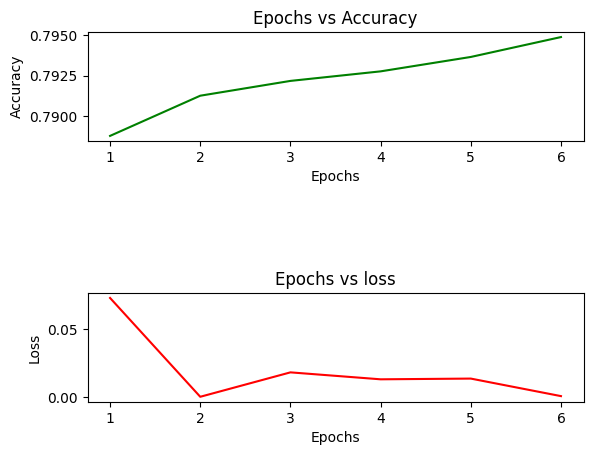

In [ ]:
plot_results(accuracy_bald,loss_bald,num_epochs)

In [ ]:
test_acc,test_loss = evaluate(model_bald,bald_test_loader,device)


In [ ]:
print(test_acc/256)
print(test_loss)

0.984841784591195
0.03446879785481559


#CLASSIFICATION OF IMAGES WEARING HAT/NOT WEARING HAT

In [ ]:
hat_train_loader,hat_test_loader,dataset = load_train_test_data(attribute_df,256,transform,3,'Wearing_Hat')

In [ ]:
model_hat = resnet18(weights='DEFAULT')
model_hat

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 167MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
#classification only for two classes
model_hat.fc=nn.Linear(in_features = 512,out_features=2)
model_hat

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Training model for 5 epochs
Epoch:1/5   Loss:0.03316172584891319    Accuracy:0.7888439725763701
Epoch:2/5   Loss:0.031204361468553543    Accuracy:0.7921115109156511
Epoch:3/5   Loss:0.005127134267240763    Accuracy:0.7934392568571415
Epoch:4/5   Loss:0.004360738210380077    Accuracy:0.7944264285608518
Epoch:5/5   Loss:0.02927330695092678    Accuracy:0.7952803320845612
[1, 2, 3, 4, 5]


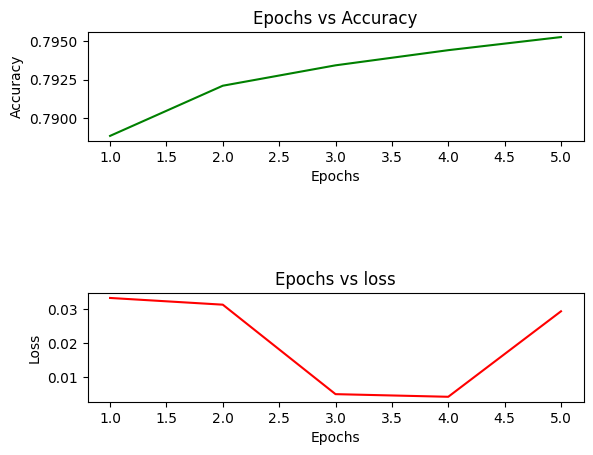

Model is trained!


In [ ]:
hat_model_path = '/content/drive/MyDrive/DL_assignment3/models/hat_model.pt'
hat_model_log = '/content/drive/MyDrive/DL_assignment3/models/hat_model.txt'
model_hat = model_hat.to(device)

if os.path.exists((hat_model_path)):
  print("\n Model trained already")
  model = resnet18(weights='DEFAULT')
  model.fc=nn.Linear(in_features = 512,out_features=2)
  model_hat = model()
  model_hat.load_state_dict(torch.load(hat_model_path))
  model_hat.to(device)
  print("student model is loaded")

else:
  print("Training model for 5 epochs")
  num_epochs = 5
  optimizer = torch.optim.Adam(model_hat.parameters(),lr=0.001)

  accuracy_hat = []
  loss_hat = []

  for epochs in range(num_epochs):
    model_hat.train()
    correct_pred = 0
    for batch_idx,batch in enumerate(hat_train_loader):
      train_loss = 0.0
      imgs,labels=batch
      imgs,labels=imgs.to(device),labels.to(device).long()
      predictions=model_hat(imgs)


      loss=nn.CrossEntropyLoss()(predictions,labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      train_loss+=loss.item()
      _,predicted_label = torch.max(predictions.data,1)
      correct_pred+=(predicted_label == labels).sum().item()

    accuracy = float(correct_pred)/float(len(dataset))
    print("Epoch:{}/5   Loss:{}    Accuracy:{}".format(epochs+1,train_loss,accuracy))
    accuracy_hat.append(accuracy)
    loss_hat.append(train_loss)
  text='Training model for classification of bald and non bald'
  write_train_log(accuracy_hat,loss_hat,num_epochs,text,hat_model_log)
  plot_results(accuracy_hat,loss_hat,num_epochs)
  torch.save(model_hat.state_dict(),hat_model_path)
  print("Model is trained!")

In [ ]:
test_acc,test_loss = evaluate(model_hat,hat_test_loader,device)
print(test_acc/256)
print(test_loss)

0.9849154874213837
0.02988560959779505


#CLASSIFICATION OF IMAGES WITH RESPECT TO THE HAIR COLOUR
## CLASSES
- BLACK HAIR
- BROWN HAIR
- GRAY HAIR
- BALD


In [ ]:
haircolour_train_loader,haircolour_test_loader,dataset = load_train_test_data(attribute_df,256,transform,3,'Bald','Black_Hair','Brown_Hair','Gray_Hair')

In [ ]:
model_hair_colour = resnet18(weights='DEFAULT')
model_hair_colour

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 27.0MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
#classification only for two classes
model_hair_colour.fc=nn.Linear(in_features = 512,out_features=4)
model_hair_colour

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Training model for 5 epochs
Epoch:1/5   Loss:0.3919937014579773    Accuracy:0.7663027405362776
Epoch:2/5   Loss:0.4072916805744171    Accuracy:0.7831045445583596
Epoch:3/5   Loss:0.6278414130210876    Accuracy:0.7957536474763407
Epoch:4/5   Loss:0.22876183688640594    Accuracy:0.8089326202681388
Epoch:5/5   Loss:0.4894460439682007    Accuracy:0.8302752858832808
[1, 2, 3, 4, 5]


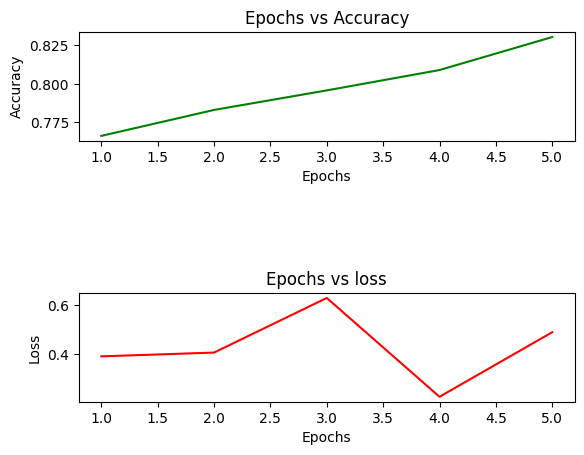

Model is trained!


In [ ]:
haircolour_model_path = '/content/drive/MyDrive/DL_assignment3/models/hair_color_model.pt'
haircolour_model_log = '/content/drive/MyDrive/DL_assignment3/models/hair_color_model.txt'
model_hair_colour = model_hair_colour.to(device)

if os.path.exists((haircolour_model_path)):
  print("\n Model trained already")
  model = resnet18(weights='DEFAULT')
  model.fc=nn.Linear(in_features = 512,out_features=4)
  model_hair_colour = model()
  model_hair_colour.load_state_dict(torch.load(haircolour_model_path))
  model_hair_colour.to(device)
  print(" model is loaded")

else:
  print("Training model for 5 epochs")
  num_epochs = 5
  optimizer = torch.optim.Adam(model_hair_colour.parameters(),lr=0.001)

  accuracy_hair_color = []
  loss_hair_color = []

  for epochs in range(num_epochs):
    model_hair_colour.train()
    correct_pred = 0
    for batch_idx,batch in enumerate(haircolour_train_loader):
      train_loss = 0.0
      imgs,labels=batch
      imgs,labels=imgs.to(device),labels.to(device).long()
      predictions=model_hair_colour(imgs)


      loss=nn.CrossEntropyLoss()(predictions,labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      train_loss+=loss.item()
      _,predicted_label = torch.max(predictions.data,1)
      correct_pred+=(predicted_label == labels).sum().item()

    accuracy = float(correct_pred)/float(len(haircolour_train_loader)*256)
    print("Epoch:{}/5   Loss:{}    Accuracy:{}".format(epochs+1,train_loss,accuracy))
    accuracy_hair_color.append(accuracy)
    loss_hair_color.append(train_loss)

  text='Training model for classification of hair colour'
  write_train_log(accuracy_hair_color,loss_hair_color,num_epochs,text,haircolour_model_log)
  plot_results(accuracy_hair_color,loss_hair_color,num_epochs)
  torch.save(model_hair_colour.state_dict(),haircolour_model_path)
  print("Model is trained!")

In [ ]:
test_acc,test_loss = evaluate(model_hair_colour,haircolour_test_loader,device)

In [ ]:
print(test_acc/256)
print(test_loss)

0.7701454402515723
0.5260749367423028


#CLASSIFICATION OF TYPE OF HAIR
##CLASSES
- BALD
- BLOND HAIR
- STRAIGHT HAIR
- WAVY HAIR

In [ ]:
hairtype_train_loader,hairtype_test_loader,dataset = load_train_test_data(attribute_df,256,transform,4,'Bald','Blond_Hair','Straight_Hair','Wavy_Hair')

In [ ]:
model_hair_type = resnet18(weights='DEFAULT')
model_hair_type

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 219MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model_hair_type.fc = nn.Linear(in_features=512,out_features=4)
model_hair_type

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  


 Training for 5 epochs
Epoch:1/5   Loss:0.33156731724739075    Accuracy:0.7926237184542587
Epoch:2/5   Loss:0.6560344696044922    Accuracy:0.814440802444795
Epoch:3/5   Loss:0.393832266330719    Accuracy:0.8274410981861199
Epoch:4/5   Loss:0.2972530722618103    Accuracy:0.8415196175078864
Epoch:5/5   Loss:0.2523396909236908    Accuracy:0.8601821273659306
[1, 2, 3, 4, 5]


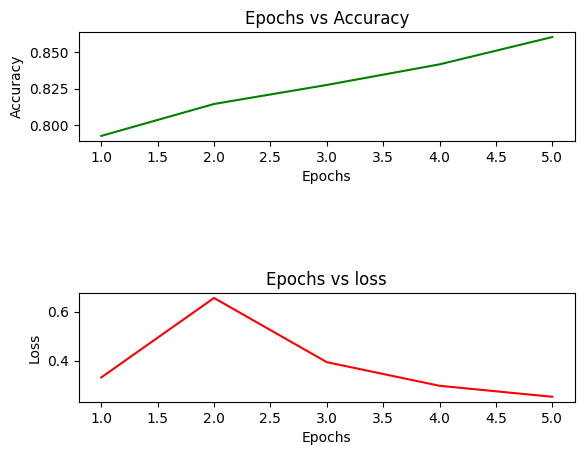

Model is trained!


In [ ]:
hairtype_model_path = '/content/drive/MyDrive/DL_assignment3/models/model_hairtype.pt'
hairtype_log_path= '/content/drive/MyDrive/DL_assignment3/models/model_hairtype_trainlog.txt'


if os.path.exists(hairtype_model_path):
  print("\n Model trained already")
  model = resnet18(weights="DEFAULT")
  model.fc=nn.Linear(in_features = 512,out_features=4)
  model_hair_type = model()
  model_hair_type.load_state_dict(torch.load(hairtype_model_path))
  model_hair_type.to(device)
  print(" model is loaded")

else:
  print("\n Training for 5 epochs")
  num_epochs = 5
  hairtype_accuracy = []
  hairtype_loss = []
  model_hair_type = model_hair_type.to(device)
  optimizer = torch.optim.Adam(model_hair_type.parameters(),lr=0.001)

  for epochs in range(num_epochs):
    correct_preds = 0

    for batch_idx,batch in enumerate(hairtype_train_loader):
      train_loss = 0.0
      imgs,labels = batch
      imgs,labels = imgs.to(device),labels.to(device).long()
      preds = model_hair_type(imgs)

      loss = nn.CrossEntropyLoss()(preds,labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      train_loss+=loss.item()
      _,predicted_label = torch.max(preds.data,1)
      correct_preds+=(predicted_label == labels).sum().item()

    accuracy = float(correct_preds)/float(len(hairtype_train_loader)*256)
    print("Epoch:{}/5   Loss:{}    Accuracy:{}".format(epochs+1,train_loss,accuracy))
    hairtype_accuracy.append(accuracy)
    hairtype_loss.append(train_loss)

  text='Training model for classification of hair type'
  write_train_log(hairtype_accuracy,hairtype_loss,num_epochs,text,hairtype_log_path)
  plot_results(hairtype_accuracy,hairtype_loss,num_epochs)
  torch.save(model_hair_type.state_dict(),hairtype_model_path)
  print("Model is trained!")


#MTL

In [ ]:
class CustomDataset_mutitask(Dataset):
  def __init__(self,attr_df,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,transform=None):

    self.file_dir = '/content/img_align_celeba'

    self.attr_df = attr_df
    self.attribute1 = attribute1 #bald
    self.attribute2 = attribute2 #wearing_hat
    self.attribute3 = attribute3 #black_hair
    self.attribute4 = attribute4 #brown_hair
    self.attribute5 = attribute5 #gray_hair
    self.attribute6 = attribute6 #blond_hair
    self.attribute7 = attribute7 #straight hair
    self.attribute8 = attribute8 #wavy_hair
    self.transform  = transform

  def __getitem__(self,idx):
    img_name = str(self.attr_df.iloc[idx]['filename'])
    img_dir = os.path.join(self.file_dir,img_name)
    img     = Image.open(img_dir)

    #labels for first task bald/not bald
    label1 = int(self.attr_df.iloc[idx][self.attribute1]==1)

    #labels for second task wearing hat/not wearing hat
    label2 = int(self.attr_df.iloc[idx][self.attribute2]==1)

    #labels for third task hair color [classes: bald/black hair/brown hair/gray hair]
    temp3_1 = int(self.attr_df.iloc[idx][self.attribute1]==1)
    temp3_2 = int(self.attr_df.iloc[idx][self.attribute3]==1)
    temp3_3 = int(self.attr_df.iloc[idx][self.attribute4]==1)
    temp3_4 = int(self.attr_df.iloc[idx][self.attribute5]==1)

    if temp3_1 == 1:
      label3 = 0
    elif temp3_2 == 1:
      label3 = 1
    elif temp3_3 == 1:
      label3 = 2
    else:
      label3 = 3

    #labels for fourth task hair type [classes: bald/blond hair/straight hair/wavy hair
    temp4_1 = int(self.attr_df.iloc[idx][self.attribute1]==1)
    temp4_2 = int(self.attr_df.iloc[idx][self.attribute6]==1)
    temp4_3 = int(self.attr_df.iloc[idx][self.attribute7]==1)
    temp4_4 = int(self.attr_df.iloc[idx][self.attribute8]==1)

    if temp4_1 == 1:
      label4 =0
    elif temp4_2 == 1:
      label4 = 1
    elif temp4_3 == 1:
      label4 = 2
    else:
      label4 = 3

    labels = torch.tensor([label1,label2,label3,label4])
    if self.transform:
      img=self.transform(img)

    return img,labels

  def __len__(self):
    return (len(self.attr_df))


In [ ]:
dataset = CustomDataset_mutitask(attribute_df,'Bald','Wearing_Hat','Black_Hair','Brown_Hair','Gray_Hair','Blond_Hair','Straight_Hair','Wavy_Hair',transform)

In [ ]:
batch_size = 256
train_set, test_set = train_test_split(range(len(dataset)), test_size=0.2, random_state=42,shuffle=True)

train_sampler = SubsetRandomSampler(train_set)
train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)

test_sampler = SubsetRandomSampler(test_set)
test_loader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)

In [ ]:
class MultiTaskResnet18(nn.Module):
  def __init__(self,n_classes1,n_classes2,n_classes3,n_classes4):
    super(MultiTaskResnet18,self).__init__()

    self.model_multitask = resnet18(weights='DEFAULT')
    num_in_features = self.model_multitask.fc.in_features
    self.model_multitask.fc = nn.Identity()
    self.fc1 = nn.Linear(num_in_features,n_classes1)
    self.fc2 = nn.Linear(num_in_features,n_classes2)
    self.fc3 = nn.Linear(num_in_features,n_classes3)
    self.fc4 = nn.Linear(num_in_features,n_classes4)

  def forward(self,x):
    x = self.model_multitask(x)
    out1 = self.fc1(x)
    out2 = self.fc2(x)
    out3 = self.fc3(x)
    out4 = self.fc4(x)
    return out1,out2,out3,out4



In [ ]:
multitask_model_path = '/content/drive/MyDrive/DL_assignment3/models/model_multitask.pt'
multitask_log_path= '/content/drive/MyDrive/DL_assignment3/models/model_multitask_trainlog.txt'

if os.path.exists(multitask_model_path):
  print(" Model is trained already!")
  multitasking_model = MultiTaskResnet18(2,2,4,4)
  multitasking_model.load_state_dict(torch.load(multitask_model_path))
  multitasking_model.to(device)
  print("model is loaded")

else:
  print("\n Training the model for 5 epochs")
  num_epochs = 5

  bald_acc,hat_acc,haircolour_acc,hairtype_acc=[],[],[],[]
  bald_loss,hat_loss,haircolour_loss,hairtype_loss=[],[],[],[]
  overall_loss = []

  multitasking_model = MultiTaskResnet18(2,2,4,4).to(device)
  multitasking_model.train()
  optimizer = torch.optim.Adam(multitasking_model.parameters(),lr=0.001)

  for epochs in range(num_epochs):
    correct_pred1=correct_pred2=correct_pred3=correct_pred4 = 0

    for batch_idx,batch in enumerate(train_loader):
      train_loss1=train_loss2=train_loss3=train_loss4=all_loss=0.0
      imgs,labels = batch

      imgs = imgs.to(device)
      bald_label,hat_label = labels[:,0].to(device).long(),labels[:,1].to(device).long()
      haircolour_label,hairtype_label = labels[:,2].to(device).long(),labels[:,3].to(device).long()

      pred1,pred2,pred3,pred4 = multitasking_model(imgs)

      loss1=nn.CrossEntropyLoss()(pred1,bald_label)
      loss2=nn.CrossEntropyLoss()(pred2,hat_label)
      loss3=nn.CrossEntropyLoss()(pred3,haircolour_label)
      loss4=nn.CrossEntropyLoss()(pred4,hairtype_label)

      loss = loss1+loss2+loss3+loss4


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      train_loss1+=loss1.item()
      train_loss2+=loss2.item()
      train_loss3+=loss3.item()
      train_loss4+=loss4.item()
      all_loss+=loss.item()

      _,predicted_label1 = torch.max(pred1.data,1)
      _,predicted_label2 = torch.max(pred2.data,1)
      _,predicted_label3 = torch.max(pred3.data,1)
      _,predicted_label4 = torch.max(pred4.data,1)

      correct_pred1+=(predicted_label1 == bald_label).sum().item()
      correct_pred2+=(predicted_label2 == hat_label).sum().item()
      correct_pred3+=(predicted_label3 == haircolour_label).sum().item()
      correct_pred4+=(predicted_label4 == hairtype_label).sum().item()

    bald_acc.append(float(correct_pred1/(len(train_loader)*256)))
    hat_acc.append(float(correct_pred2/(len(train_loader)*256)))
    haircolour_acc.append(float(correct_pred3/(len(train_loader)*256)))
    hairtype_acc.append(float(correct_pred4/(len(train_loader)*256)))

    bald_loss.append(train_loss1)
    hat_loss.append(train_loss2)
    haircolour_loss.append(train_loss3)
    hairtype_loss.append(train_loss4)
    overall_loss.append(all_loss)

    print("Epoch :{}/5".format(epochs+1))
    print("Task1_accuracy:{}\tTask1_loss:{}".format(bald_acc[-1],bald_loss[-1]))
    print("Task2_accuracy:{}\tTask2_loss:{}".format(hat_acc[-1],hat_loss[-1]))
    print("Task3_accuracy:{}\tTask3_loss:{}".format(haircolour_acc[-1],haircolour_loss[-1]))
    print("Task4_accuracy:{}\tTask4_loss:{}".format(hairtype_acc[-1],hairtype_loss[-1]))
    print("Overall_loss :{}".format(all_loss))



 Training the model for 5 epochs
Epoch :1/5
Task1_accuracy:0.9849233537066246	Task1_loss:0.012687294743955135
Task2_accuracy:0.9859091581230284	Task2_loss:0.0037038561422377825
Task3_accuracy:0.758317724763407	Task3_loss:0.3072977066040039
Task4_accuracy:0.7926113958990536	Task4_loss:0.3072977066040039
Overall_loss :0.8600075244903564
Epoch :2/5
Task1_accuracy:0.9887803134858044	Task1_loss:0.00045905777369625866
Task2_accuracy:0.9892793769716088	Task2_loss:0.005200382322072983
Task3_accuracy:0.7796049388801262	Task3_loss:0.4240272343158722
Task4_accuracy:0.8139787066246057	Task4_loss:0.4240272343158722
Overall_loss :0.7097474336624146
Epoch :3/5
Task1_accuracy:0.9901666009463722	Task1_loss:0.0008431710302829742
Task2_accuracy:0.9905609227129337	Task2_loss:0.01675664447247982
Task3_accuracy:0.7907075611198738	Task3_loss:0.30451110005378723
Task4_accuracy:0.826948195977918	Task4_loss:0.30451110005378723
Overall_loss :0.7159030437469482
Epoch :4/5
Task1_accuracy:0.9915220820189274	Task1_

In [ ]:
epochs = list(range(1,num_epochs+1))

# Create a dictionary of data for the dataframe
data = {'Epochs': epochs,
        'Task_1_Accuracy': bald_acc,
        'Task_1_loss': bald_loss,
        'Task_2_Accuracy': hat_acc,
        'Task_2_loss': hat_loss,
        'Task_3_Accuracy': haircolour_acc,
        'Task_3_loss': haircolour_loss,
        'Task_4_Accuracy': hairtype_acc,
        'Task_4_loss': hairtype_loss,
        'Overall_loss': overall_loss}

# Create the dataframe from the dictionary
df = pd.DataFrame(data)




# Append a note to the file
with open(multitask_log_path, 'w') as f:
    df_to_string=df.to_string(header=True,index=False)
    f.write(df_to_string)
    f.write('\nNote: Accuracy values are not in percentage.')


In [ ]:
#testing
multitasking_model.eval()
with torch.no_grad():
  test_loss1=test_loss2=test_loss3=test_loss4=0
  overall_test_loss = 0
  correct_pred1_test=correct_pred2_test=correct_pred3_test=correct_pred4_test=0
  for batch_idx,batch in enumerate(test_loader):
    imgs,labels = batch
    imgs = imgs.to(device)
    bald_label,hat_label = labels[:,0].to(device).long(),labels[:,1].to(device).long()
    haircolour_label,hairtype_label = labels[:,2].to(device).long(),labels[:,3].to(device).long()

    pred1,pred2,pred3,pred4 = multitasking_model(imgs)
    loss1=nn.CrossEntropyLoss()(pred1,bald_label)
    loss2=nn.CrossEntropyLoss()(pred2,hat_label)
    loss3=nn.CrossEntropyLoss()(pred3,haircolour_label)
    loss4=nn.CrossEntropyLoss()(pred4,hairtype_label)

    loss = loss1+loss2+loss3+loss4

    test_loss1+=loss1.item()
    test_loss2+=loss2.item()
    test_loss3+=loss3.item()
    test_loss4+=loss4.item()
    overall_test_loss+=loss.item()

    _,predicted_label1 = torch.max(pred1.data,1)
    _,predicted_label2 = torch.max(pred2.data,1)
    _,predicted_label3 = torch.max(pred3.data,1)
    _,predicted_label4 = torch.max(pred4.data,1)

    correct_pred1_test+=(predicted_label1 == bald_label).sum().item()
    correct_pred2_test+=(predicted_label2 == hat_label).sum().item()
    correct_pred3_test+=(predicted_label3 == haircolour_label).sum().item()
    correct_pred4_test+=(predicted_label4 == hairtype_label).sum().item()






In [ ]:
print("\n Test loss of Task1 :{}".format(test_loss1/(len(test_loader))))
print("\n Test loss of Task2 :{}".format((test_loss2)/(len(test_loader))))
print("\n Test loss of Task3 :{}".format((test_loss3)/(len(test_loader))))
print("\n Test loss of Task4 :{}".format((test_loss4)/(len(test_loader))))
print("\n overall test loss :{}".format((overall_test_loss)/(len(test_loader))))

print("\n accuracy of Task1 :{}".format(float(correct_pred1_test/(len(test_loader)*256))))
print("\n accuracy of Task2 :{}".format(float(correct_pred2_test/(len(test_loader)*256))))
print("\n accuracy of Task3 :{}".format(float(correct_pred3_test/(len(test_loader)*256))))
print("\n accuracy of Task4 :{}".format(float(correct_pred4_test/(len(test_loader)*256))))



 Test loss of Task1 :0.03017745080950184

 Test loss of Task2 :0.03118710226669275

 Test loss of Task3 :0.5038471849834394

 Test loss of Task4 :0.48682413292381

 overall test loss :1.052035870791981

 accuracy of Task1 :0.9861438679245284

 accuracy of Task2 :0.9851857311320755

 accuracy of Task3 :0.7758696933962265

 accuracy of Task4 :0.780562106918239
